# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from webdriver_manager.chrome import ChromeDriverManager
executable_path = {'executable_path': ChromeDriverManager().install()}

#Launch the browser
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)
html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
soup_obj = soup(html, 'html.parser')
# Find the HTML table
table = soup_obj.find('table')

In [5]:
# Extract all rows of data
# Extract the table headers
headers = []
header_row = table.find('tr')
for header in header_row.find_all('th'):
    headers.append(header.text.strip())

# Extract the table rows and data
data_rows = table.find_all('tr')[1:]
data = []
for row in data_rows:
    row_data = []
    for cell in row.find_all('td'):
        row_data.append(cell.text.strip())
    data.append(row_data)

# Print the table headers and data
print(headers)
for row in data:
    print(row)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', 

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty DataFrame
# Create an empty list to store data dictionaries
data_list = []

# Iterate over the scraped data and populate the list
for row in data:
    data_dict = {
        'id': row[0],
        'terrestrial_date': row[1],
        'sol': row[2],
        'ls': row[3],
        'month': row[4],
        'min_temp': row[5],
        'pressure': row[6]
    }
    data_list.append(data_dict)

# Create a DataFrame from the list of dictionaries
df = pd.concat([pd.DataFrame(data_list)])

# Print the DataFrame
print(df)



        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


In [8]:
# Create an empty list to store the rows
rows = []

# Loop through the scraped data and populate the list
for row in data:
    row_data = {
        'id': row[0],
        'terrestrial_date': row[1],
        'sol': row[2],
        'ls': row[3],
        'month': row[4],
        'min_temp': row[5],
        'pressure': row[6]
    }
    rows.append(row_data)

# Print the list of rows
print(rows)


[{'id': '2', 'terrestrial_date': '2012-08-16', 'sol': '10', 'ls': '155', 'month': '6', 'min_temp': '-75.0', 'pressure': '739.0'}, {'id': '13', 'terrestrial_date': '2012-08-17', 'sol': '11', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '740.0'}, {'id': '24', 'terrestrial_date': '2012-08-18', 'sol': '12', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '741.0'}, {'id': '35', 'terrestrial_date': '2012-08-19', 'sol': '13', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '732.0'}, {'id': '46', 'terrestrial_date': '2012-08-20', 'sol': '14', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '740.0'}, {'id': '57', 'terrestrial_date': '2012-08-21', 'sol': '15', 'ls': '158', 'month': '6', 'min_temp': '-78.0', 'pressure': '740.0'}, {'id': '68', 'terrestrial_date': '2012-08-22', 'sol': '16', 'ls': '158', 'month': '6', 'min_temp': '-77.0', 'pressure': '740.0'}, {'id': '79', 'terrestrial_date': '2012-08-23', 'sol': '17', 'ls': '159', 'month': '6', 'mi

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Create a list of column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create a Pandas DataFrame from the list of rows and column names
df = pd.DataFrame(rows, columns=columns)

# Print the DataFrame
print(df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


In [10]:
# Confirm DataFrame was created successfully
# Check the shape of the DataFrame
print("Shape:", df.shape)

# Check the column names
print("Columns:", df.columns)

# Check the data types of the columns
print("Data types:\n", df.dtypes)

# Check the first few rows of the DataFrame
print("First few rows:\n", df.head())

Shape: (1867, 7)
Columns: Index(['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'], dtype='object')
Data types:
 id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object
First few rows:
    id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
# Create a list of column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create a Pandas DataFrame from the list of rows and column names
df = pd.DataFrame(rows, columns=columns)

# Examine the data type of each column
print(df.dtypes)


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [12]:
# Change data types for data analysis
# Create a list of column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create a Pandas DataFrame from the list of rows and column names
df = pd.DataFrame(rows, columns=columns)

# Change data types for analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(float)
df['month'] = df['month'].astype(float)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

# Check the data types after conversion
print(df.dtypes)


id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                      float64
min_temp                   float64
pressure                   float64
dtype: object


In [13]:
# Confirm type changes were successful by examining data types again
# Create a list of column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create a Pandas DataFrame from the list of rows and column names
df = pd.DataFrame(rows, columns=columns)

# Change data types for analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(float)
df['month'] = df['month'].astype(float)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

# Check the data types after conversion
print(df.dtypes)


id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                      float64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print("Number of months on Mars:", num_months)

Number of months on Mars: 12


In [15]:
# 2. How many Martian days' worth of data are there?
num_martian_days = df['sol'].nunique()
print("Number of Martian days worth of data:", num_martian_days)

Number of Martian days worth of data: 1867


In [16]:
# 3. What is the average low temperature by month?
monthly_avg_min_temp = df.groupby('month')['min_temp'].mean()

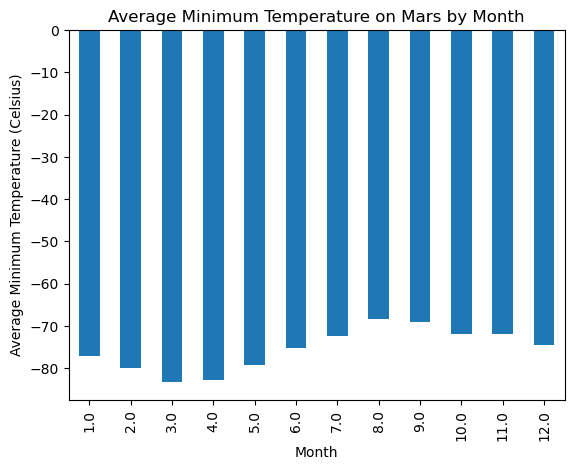

In [17]:
# Plot the average temperature by month
monthly_avg_min_temp.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (Celsius)')
plt.title('Average Minimum Temperature on Mars by Month')
plt.show()

In [23]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = df.loc[df['min_temp'].idxmin(), 'month']
hottest_month = df.loc[df['min_temp'].idxmax(), 'month']

print("Coldest month:", coldest_month)
print("Hottest month:", hottest_month)


Coldest month: 3.0
Hottest month: 1.0


In [24]:
# Calculate the average atmospheric pressure by Martian month
average_pressure_by_month = df.groupby('month')['pressure'].mean()

print(average_pressure_by_month)


month
1.0     862.488506
2.0     889.455056
3.0     877.322917
4.0     806.329897
5.0     748.557047
6.0     745.054422
7.0     795.105634
8.0     873.829787
9.0     913.305970
10.0    887.312500
11.0    857.014493
12.0    842.156627
Name: pressure, dtype: float64


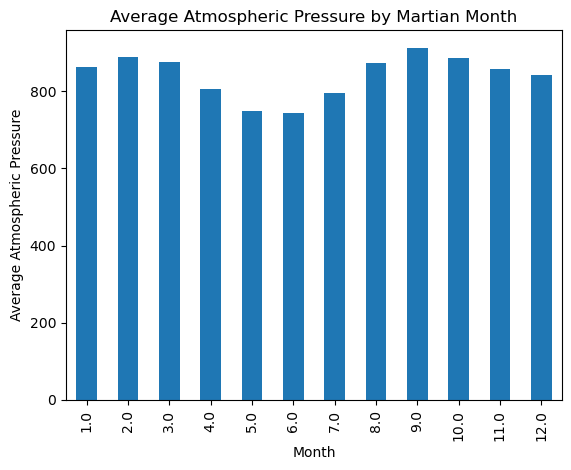

In [25]:
# Plot the average pressure by month
# Calculate the average atmospheric pressure by Martian month
average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Plot the average pressure by month
average_pressure_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.title('Average Atmospheric Pressure by Martian Month')
plt.show()


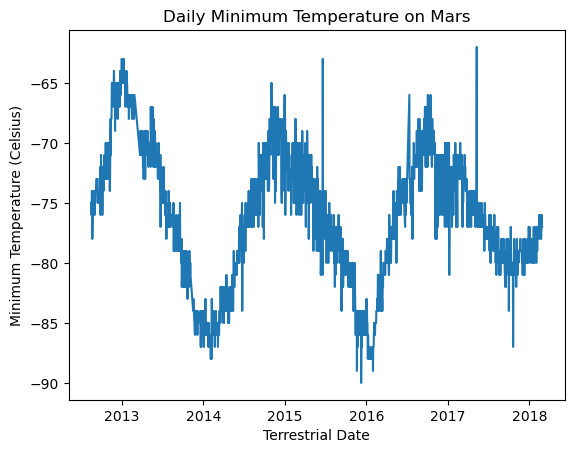

In [26]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Plot the daily minimum temperature
plt.plot(df['terrestrial_date'], df['min_temp'])
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (Celsius)')
plt.title('Daily Minimum Temperature on Mars')
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [27]:
# Write the data to a CSV
# Export the DataFrame to a CSV file
df.to_csv('mars_data.csv', index=False)


In [28]:
browser.quit()